# Imports

In [24]:
import os
import pandas as pd
from pydub.utils import mediainfo
import re
#from datetime import timedelta

# Visualization

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#sns.set(style="whitegrid")

# Helpers

In [38]:
def get_audio_files(directory, extensions):
    """Get a list of audio files in the specified directory and its subdirectories with given extensions."""
    audio_files = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            if any(file.endswith(ext) for ext in extensions):
                audio_files.append(os.path.join(root, file))
    return audio_files

def extract_id(name):
    
    # Extract numeric ID
    match = re.search(r'(\d+)', name)
    if match:
        participant_id = int(match.group(0))
    else:
        participant_id = None

    return participant_id

def analyze_audio_files(directories, extensions):
    """Analyze audio files and collect their properties."""
    data = []
    for directory in directories:
        audio_files = get_audio_files(directory, extensions)
        for audio_file in audio_files:
            info = mediainfo(audio_file)

            # Duration
            duration = round(float(info['duration']), 2) if 'duration' in info else 0
            duration_min, duration_sec = divmod(int(duration), 60)
            duration_hr, duration_min = divmod(duration_min, 60)
            duration_string = f"{duration_hr:02d}:{duration_min:02d}:{duration_sec:02d}" # Format as hh:mm:ss

            # File name
            name, ext = os.path.splitext(os.path.basename(audio_file))
            
            data.append({
                'File_name': name,
                "Format": ext,
                "ID": extract_id(name),
                'Duration': duration_string,
                'Duration_sec': duration,
                #"Duration_min": duration_min,
                'Experiment': os.path.basename(directory),

            })
    
    return pd.DataFrame(data)

# Analysis

In [39]:
directories = ["../data/OBE1","../data/OBE2","../data/Compassion"]
extensions = ["m4a","wav","mp4"]

# Analyze audio files
df = analyze_audio_files(directories, extensions)

df.to_csv("raw_data.csv")
df

,File_name,Format,ID,Duration,Duration_sec,Experiment
0,ID 05,.mp4,5,00:10:15,615.68,OBE1
1,Id 08,.m4a,8,00:04:34,274.65,OBE1
2,Id 13,.m4a,13,00:07:19,439.70,OBE1
3,Id 13b,.m4a,13,00:03:21,201.60,OBE1
4,Id 14,.m4a,14,00:02:52,172.97,OBE1
...,...,...,...,...,...,...
77,S304,.m4a,304,00:07:05,425.92,Compassion
78,S305con,.m4a,305,00:01:41,101.10,Compassion
79,S306,.m4a,306,00:08:50,530.71,Compassion
80,S307,.m4a,307,00:06:15,375.70,Compassion


# Visualize

In [10]:
df = pd.read_csv("raw_data.csv")

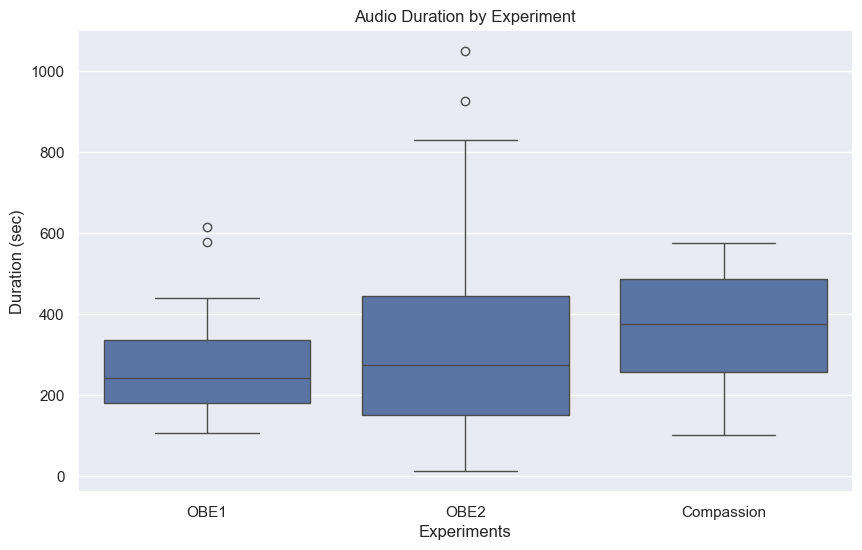

In [17]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a box plot with seaborn
sns.boxplot(x='Experiment', y='Duration_sec', data=df)

# Add titles and labels
plt.title('Audio Duration by Experiment')
plt.xlabel('Experiments')
plt.ylabel('Duration (sec)')

# Show the plot
plt.show()

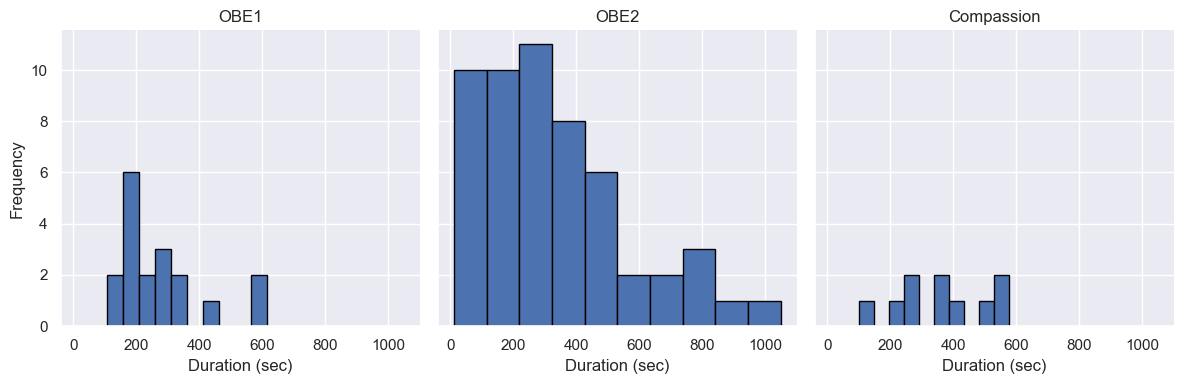

In [46]:
# Create a FacetGrid for separate histograms for each experiment
g = sns.FacetGrid(df, col="Experiment", col_wrap=3, height=4)

# Map the data to histograms, using the 'Duration_sec' column (in seconds)
g.map(plt.hist, "Duration_sec", bins = 10 ,edgecolor='black') #color='skyblue', bins=10

# Add a title and adjust layout
g.set_titles("{col_name}")
g.set_axis_labels("Duration (sec)", "Frequency")

plt.tight_layout()
plt.show()

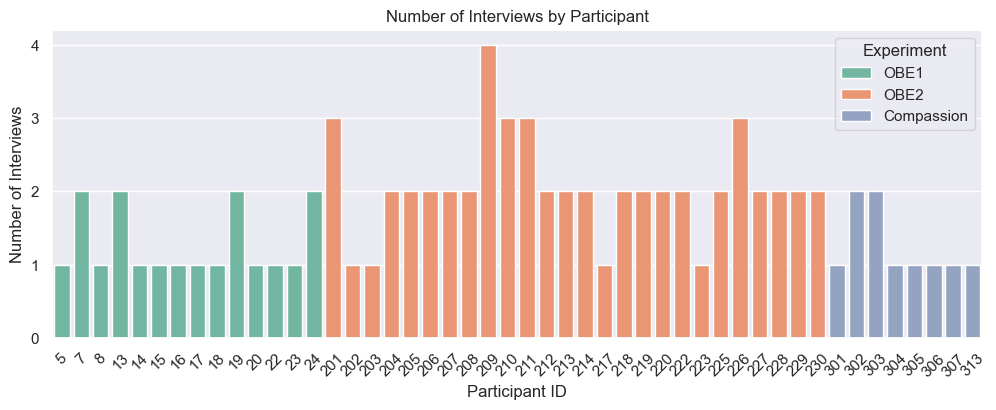

In [63]:
plt.figure(figsize=(12, 4))

# Group by 'ID' and 'Experiment', then count interviews
sns.countplot(x='ID', hue='Experiment', data=df, palette='Set2')

# Title and labels
plt.title('Number of Interviews by Participant')
plt.xlabel('Participant ID')
plt.ylabel('Number of Interviews')
plt.xticks(rotation=45)

# Set y-axis to show only integers
plt.yticks(range(0, int(df['ID'].value_counts().max()) + 1))

# Add legend
plt.legend(title='Experiment')

# Show the plot
plt.show()

# Average duration by Participants

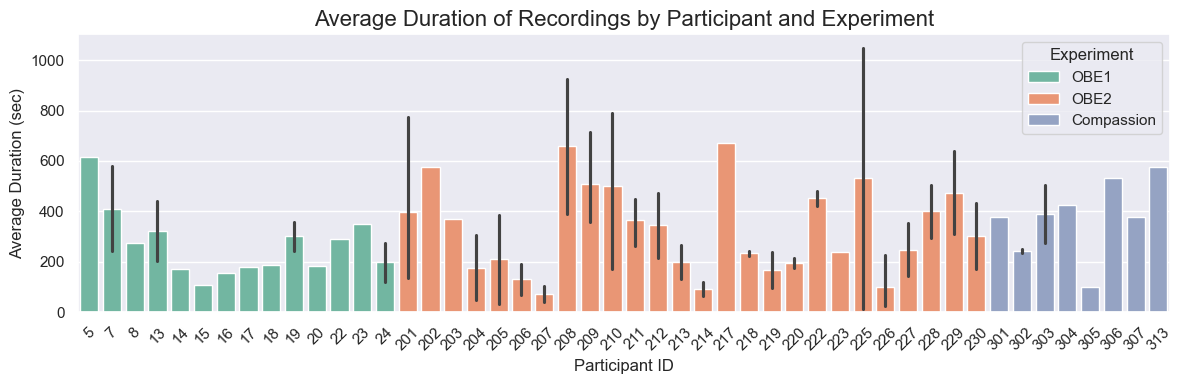

In [62]:
plt.figure(figsize=(12, 4))

# Create a bar plot for the average duration of recordings by participant and experiment
sns.barplot(
    x='ID', 
    y='Duration_sec', 
    hue='Experiment', 
    data=df, 
    #ci=None,  # Disable confidence intervals
    palette='Set2'
)

# Add title and labels
plt.title('Average Duration of Recordings by Participant and Experiment', fontsize=16)
plt.xlabel('Participant ID')
plt.ylabel('Average Duration (sec)')
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Experiment')

# Adjust layout
plt.tight_layout()
plt.show()


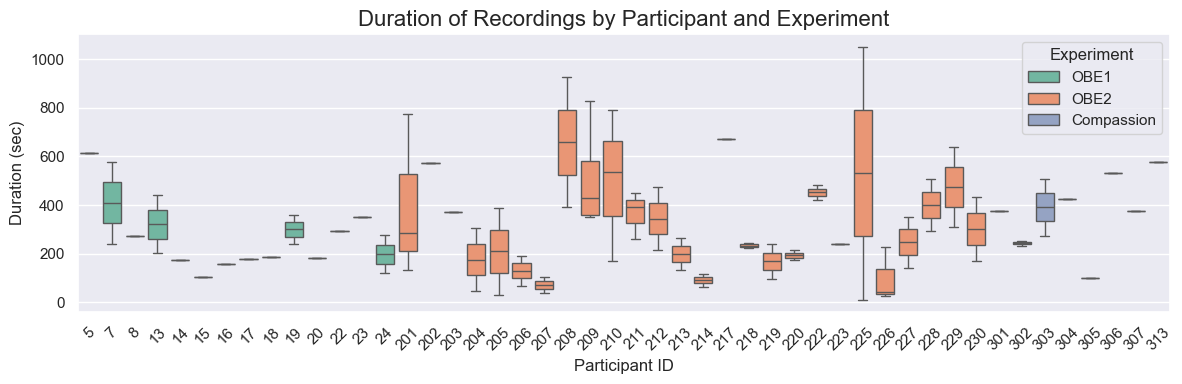

In [61]:
plt.figure(figsize=(12, 4))

# Create a box plot for the duration of recordings by participant and experiment
sns.boxplot(
    x='ID', 
    y='Duration_sec', 
    hue='Experiment', 
    data=df, 
    palette='Set2'
)

# Add title and labels
plt.title('Duration of Recordings by Participant and Experiment', fontsize=16)
plt.xlabel('Participant ID')
plt.ylabel('Duration (sec)')
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Experiment')

# Adjust layout
plt.tight_layout()
plt.show()